In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

path=r"C:\Users\debasish\DS-AI\N-IT\datafiles\Visadataset.csv"


visa_df=pd.read_csv(path)
cat_column=visa_df.select_dtypes(include='object').columns
num_column=visa_df.select_dtypes(exclude='object').columns

**box plot**
  
- it is used to identify the outliers

- outlier is an observation having huge positive value or huge negative value

- Q1=25p , Q2=50p, Q3=75p

- IQR=Inter quartile range = Q3-Q1

- Q3+1.5*IQR and Q1-1.5*IQR

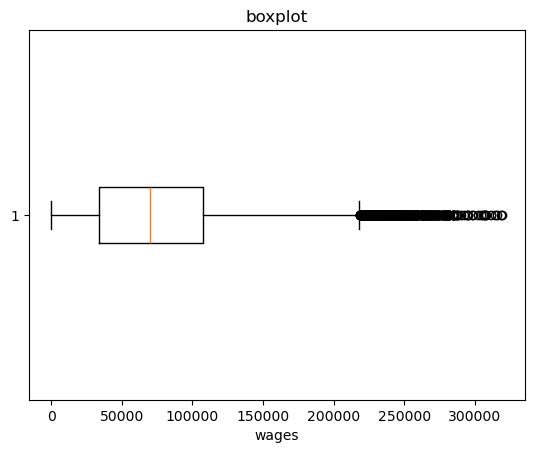

In [3]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('boxplot')
plt.xlabel('wages')
plt.show()

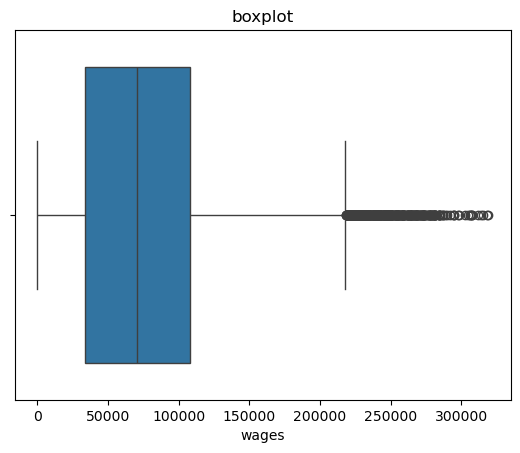

In [4]:

sns.boxplot(wage_data,orient='h')
plt.title('boxplot')
plt.xlabel('wages')
plt.show()

**plot the histogram plot and box plot side by side**

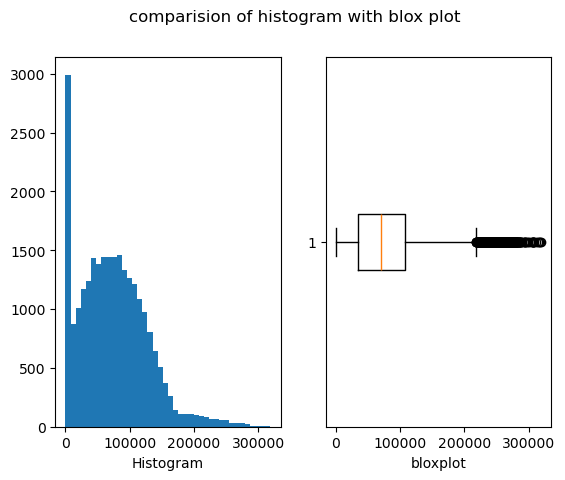

In [6]:
plt.suptitle('comparision of histogram with blox plot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=40)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('bloxplot')
plt.show()

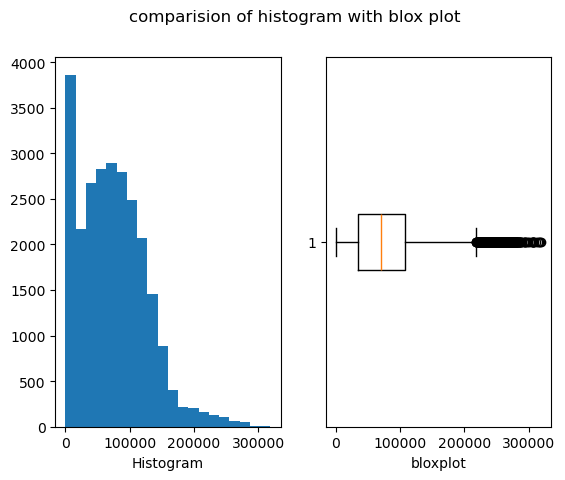

In [7]:
plt.suptitle('comparision of histogram with blox plot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('bloxplot')
plt.show()

**finding the outliers**

- we already know that outliers availabe less than Q1-1.5*IQR AND Q3+1.5*IQR

- step-1:

    - calculate Q1=25P

    - calculate Q2=50p

    - calculate Q3=75p

- step-2:

    - calculate IQR=Q3-Q1

- step-3:

    - calculate LB=Q1-1.5*IQR

    - calculate UB=Q3+1.5*IQR

- step-4:

    - con1= wage_data<LB

    - CON2= wage_data>ub

    - con3= con1 or con2 (use bitwise operatoe)
- step-5:

    - data[con3]

In [9]:
#step-1

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

#step-2

IQR=Q3-Q1

#step-3

LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

#step-4

con1= wage_data < LB
con2= wage_data > UB
con3= con1 | con2
#bitwise operator used for compare
#bitwise data===0 and 1 == True false
#step-5

outlier_data=wage_data[con3]
outlier_df=pd.DataFrame(outlier_data)
outlier_df


,prevailing_wage
14,220081.73
34,225569.73
130,247393.01
216,269321.68
221,219529.62
...,...
25191,280482.51
25195,234308.77
25468,272715.74
25469,273772.47


In [10]:
#step-1

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

#step-2

IQR=Q3-Q1

#step-3

LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

#step-4

con1= wage_data > LB
con2= wage_data < UB
con3= con1 & con2
#bitwise operator used for compare
#bitwise data===0 and 1 == True false
#step-5

non_outlier_data=wage_data[con3]
non_outlier_df=pd.DataFrame(non_outlier_data)
non_outlier_df


,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25474,51104.7800
25475,77092.5700
25477,146298.8500
25478,86154.7700


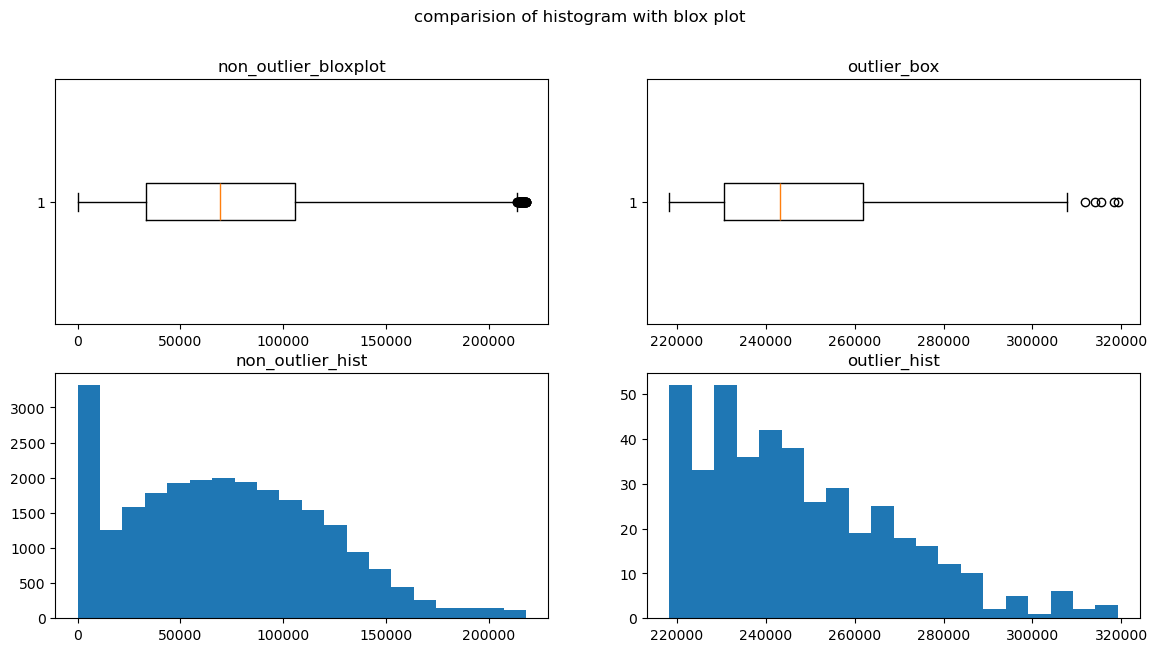

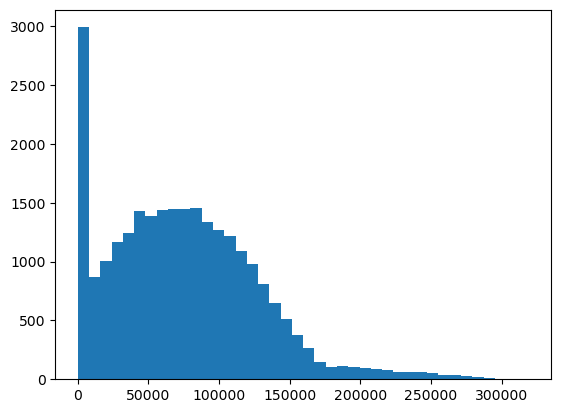

In [11]:
plt.figure(figsize=(14,7))
plt.suptitle('comparision of histogram with blox plot')
plt.subplot(2,2,3).hist(non_outlier_data,bins=20)
plt.title('non_outlier_hist')
plt.subplot(2,2,1).boxplot(non_outlier_data,vert=False)
plt.title('non_outlier_bloxplot')
plt.subplot(2,2,4).hist(outlier_df,bins=20)
plt.title('outlier_hist')
plt.subplot(2,2,2).boxplot(outlier_df,vert=False)
plt.title('outlier_box')
plt.show()
plt.hist(wage_data,bins=40)
plt.show()

(array([85., 88., 80., 55., 44., 34., 22.,  7.,  7.,  5.]),
 array([218318.76 , 228407.911, 238497.062, 248586.213, 258675.364,
        268764.515, 278853.666, 288942.817, 299031.968, 309121.119,
        319210.27 ]),
 <BarContainer object of 10 artists>)

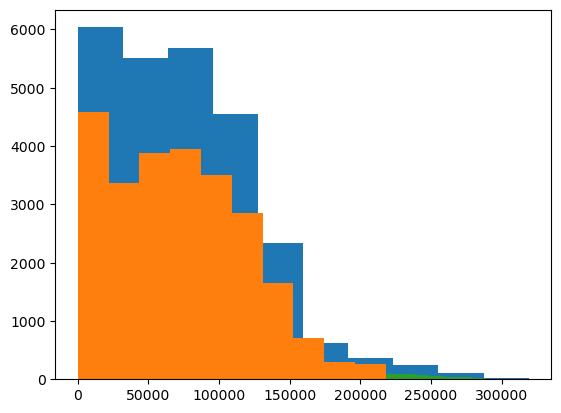

In [12]:
plt.hist(wage_data)
plt.hist(non_outlier_df)
plt.hist(outlier_df)

**dealing with outliers**

1- Drop the outliers(not recommended)

    -droping outliers=droping rows=dropping some col value

    -we may loose some imp data.

    -if the outlier percenatage less than 2 % of total then we can drop

    -here the number of outlier = 427

    -the number of total count(rows)=25480

    -the outlier percentage = 1.67% which is less than 2%
        
2- Filling with median value

        -we know median is not affected by outliers.

        -best practice is to fill the outliers with median

3- capping or flooring

    -the outliers less than Lb filled with Lb value

    -the outliers more than Ub filled with Ub value

4.Isolation forest

    -is an ML model used to find the outliers and anamolies

In [15]:
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

**np.where**

- in numpy we have where it takes 3 agruments

-1. condition

-2. value if condition is true

-3. value if condition is false

- it is applicable only for binary

In [17]:
list1=[]
for value in wage_data:
    if value < LB or value> UB:
        median=wage_data.median()
        list1.append(median)
    else:
        list1.append(value)
list1

[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 70308.20999999999,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 70308.20999999999,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34

In [18]:
dict1={'sub': ['ds','de','cs'],
       "marks":[100,200,300]}
df=pd.DataFrame(dict1)
l=[]
for i in df['marks']:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,sub,marks
0,ds,100
1,de,1
2,cs,1


In [19]:
dict1={'sub': ['ds','de','cs'],
       "marks":[100,200,300]}
df1=pd.DataFrame(dict1)
con1=df1['marks']>100
n=np.where(con1,1,df1['marks'])
df1['marks']=n
df1

,sub,marks
0,ds,100
1,de,1
2,cs,1


In [20]:
wd=visa_df['prevailing_wage']
con1= wd<LB
con2= wd> UB
con= con1 | con2
wage_median=wd.median()
n=np.where(con,wage_median,wd)
n

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [21]:
visa_df['prevailing_wage_up']=n

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

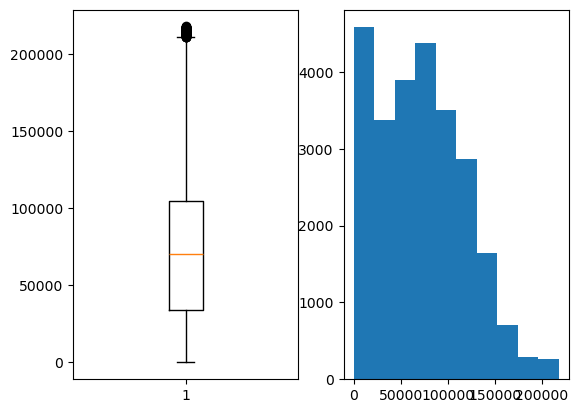

In [22]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_up'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_up'])

(array([4580., 3368., 3890., 3942., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

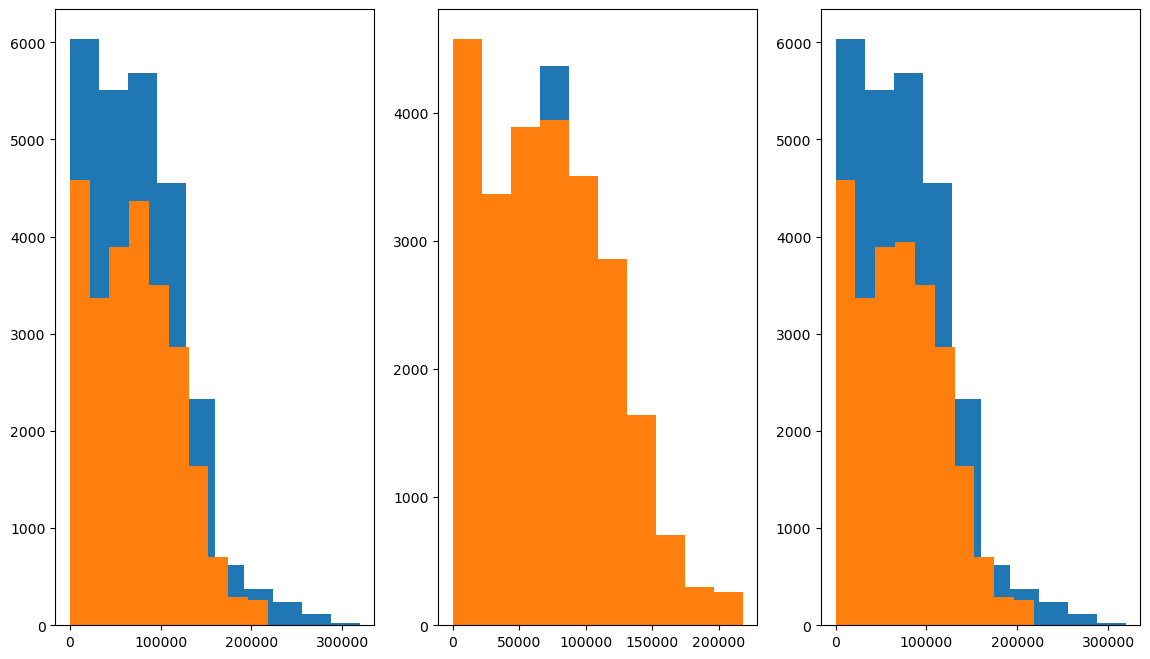

In [23]:
plt.figure(figsize=(14,8))
plt.subplot(1,3,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,3,1).hist(visa_df['prevailing_wage_up'])
plt.subplot(1,3,2).hist(visa_df['prevailing_wage_up'])
plt.subplot(1,3,2).hist(non_outlier_df)
plt.subplot(1,3,3).hist(visa_df['prevailing_wage'])
plt.subplot(1,3,3).hist(non_outlier_df)

In [24]:
cat_cols=[k for k,v in visa_df.dtypes.items() if v=="object"]
num_cols=[k for k,v in visa_df.dtypes.items() if v!="object"]

** Bi variate analysis **

- we have already seen uni variate analysis

    - categorical analysis
    
         - frequency table
    
        - relative frequency table
    
        - bar char pie chart
    
    - numerical anaylisis
    
        - histogram
    
         - distribution plot
    
        - box plot
    
        - outliers and filling analysis

- in  bi variate analysis we perform
- 
    -  categorical and numerical analysis
 
    - categorical and categorical analysis
 
    - numerical and numerical analysis

** categorical - categorical **
let
- contienent

- case_status

In [27]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [28]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- find the certified observations continent wise

- find denied observation continent wise

In [30]:
cert,denied=[],[]
for i in visa_df['continent'].value_counts().keys():
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3 = visa_df['case_status']=='Denied'
    con4=con1&con2
    con5=con1&con3
    cert.append(len(visa_df[con4]))
    denied.append(len(visa_df[con5]))
index=visa_df['continent'].value_counts().keys()
df=pd.DataFrame(zip(cert,denied),index=index,columns=['Certified_visa','Denied_visa'])
df

,Certified_visa,Denied_visa
continent,,
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


*Cross tab**

- above df can be made by using a method cross tab

- two agruments it takes - index,column

<Axes: xlabel='continent'>

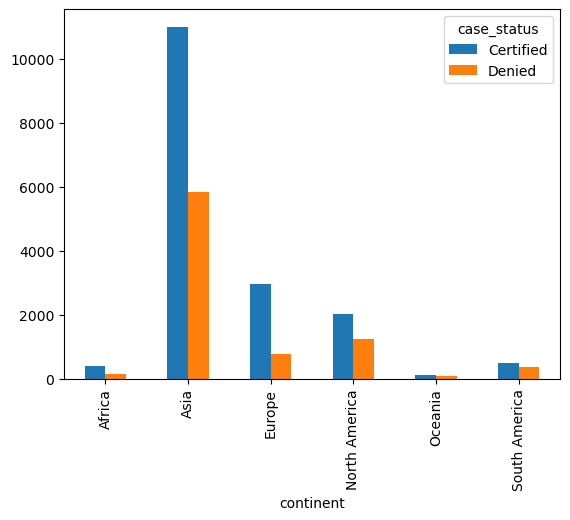

In [32]:
index_col=visa_df['continent']
data_col=visa_df['case_status']
df2=pd.crosstab(index_col,data_col)
df2.plot(kind='bar')

**Multi variate col**

- education

- continent

- case status

- we already know asia has 11k accepted visa

- i further want to break down using education wise



<Axes: xlabel='continent'>

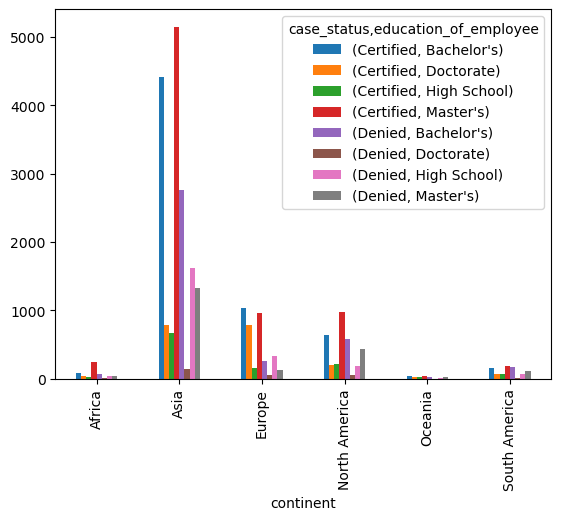

In [34]:
index_col=visa_df['continent']
data_col=[visa_df['case_status'],visa_df['education_of_employee']]
df3=pd.crosstab(index_col,data_col)
df3.plot(kind='bar')

In [35]:
df3

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [36]:
num_cols

['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'prevailing_wage_up']

In [37]:
cat_cols

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [38]:
cat_cols=visa_df.select_dtypes(include='object').columns
num_cols=visa_df.select_dtypes(exclude='object').columns

**NUMERICAL VS NUMERICAL**

- to understsnd num cols relation we need to plot scatter plots 

- scatter gives the relation bet two num cols

- bar chart - pie chart - histogram - scatter plot

- scatter comes under matplotlib.pyplot package as .scatter 

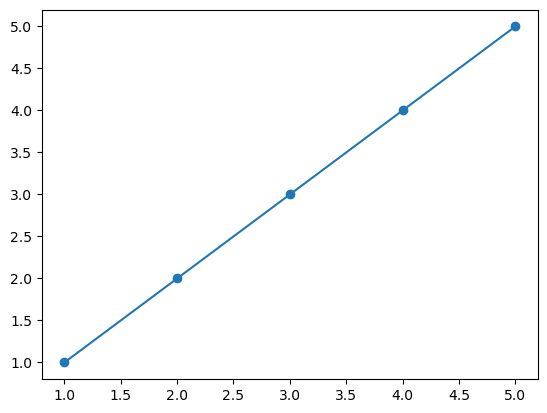

In [41]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

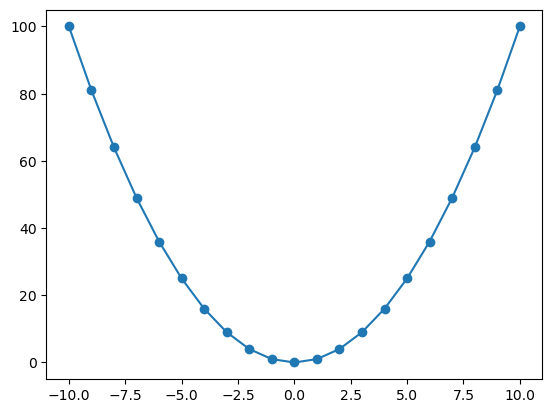

In [42]:
l1=[i for i in range(-10,11) ]
l2=[i**2 for i in range(-10,11) ]
plt.scatter(l1,l2)
plt.plot(l1,l2)

In [43]:
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage',
       'prevailing_wage_up'],
      dtype='object')

Text(0, 0.5, 'prevailing_wage')

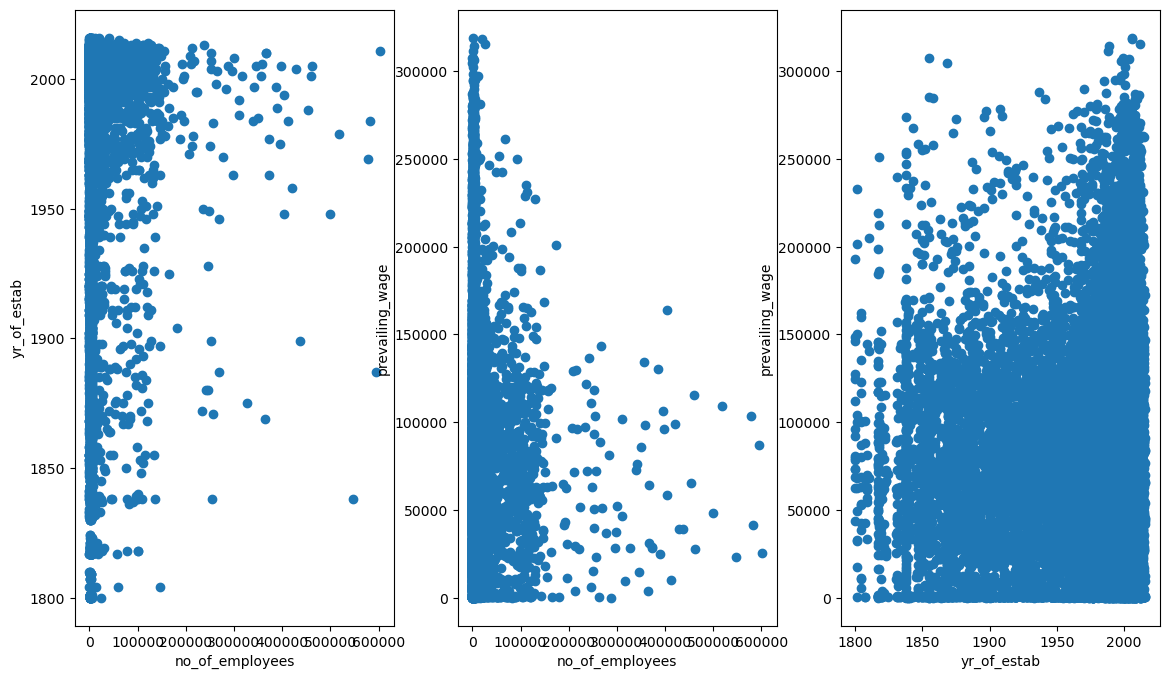

In [44]:
x1=visa_df['no_of_employees']
x2=visa_df['yr_of_estab']
x3=visa_df['prevailing_wage']
plt.figure(figsize=(14,8))
plt.subplot(1,3,1).scatter(x1,x2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
plt.subplot(1,3,2).scatter(x1,x3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
plt.subplot(1,3,3).scatter(x2,x3)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')

- covariance vs correlation

- covariance - will give whether the cols have relation or not

    - it basicalyy explains whether the cols have positive , neg or not relation at all i.e status of the relation

- correlation - it gives how much is the relation between cols

    - it denotes with 'r'

    - r varies from -1 to 1

    - -1 to 0 negative relation quantity

    - 0 to 1 postive relation quantity

    - 0 means no relation

In [46]:
visa_df[num_cols].corr()

,no_of_employees,yr_of_estab,prevailing_wage,prevailing_wage_up
no_of_employees,1.000000,-0.017770,-0.009523,-0.006762
yr_of_estab,-0.017770,1.000000,0.012342,0.015885
prevailing_wage,-0.009523,0.012342,1.000000,0.900557
prevailing_wage_up,-0.006762,0.015885,0.900557,1.000000


In [47]:
cor_d=visa_df.corr(numeric_only= True)
cor_d

,no_of_employees,yr_of_estab,prevailing_wage,prevailing_wage_up
no_of_employees,1.000000,-0.017770,-0.009523,-0.006762
yr_of_estab,-0.017770,1.000000,0.012342,0.015885
prevailing_wage,-0.009523,0.012342,1.000000,0.900557
prevailing_wage_up,-0.006762,0.015885,0.900557,1.000000


**Heat Map**

- heat map is one of the imp visualisation method to show the matrix form of values.

- it is under seaborn package

- in every matrix we have highest value and lowest value available

- heat map will give color visualisation 

- also it provides color bar i.e which color is of which value

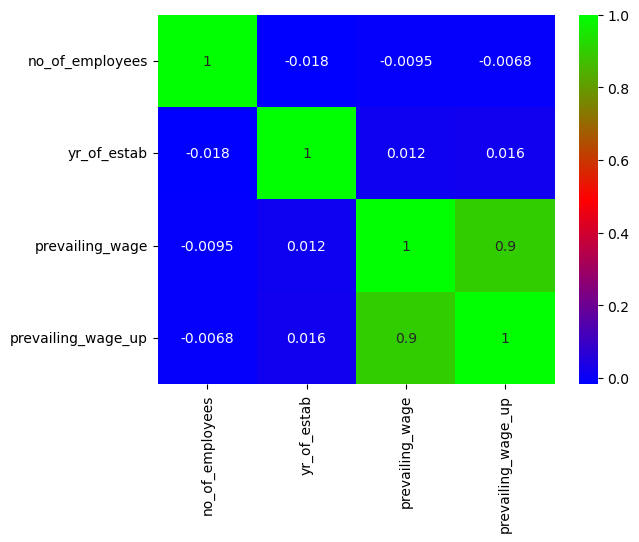

In [49]:
sns.heatmap(cor_d,cmap='brg',annot=True)
plt.show()

- by seeing the graphs we might not say the relation status

- it it best practice to get the percentage of relation uaing correlation

- all 3 cols have appx zero percentage of relation

- == cols have no relation

- == independent of each other

- in ML we expect the input cols should be independent to each other

- corr method gives matrix views

- thats why always go with heat map visualisation